# Import data 

In [11]:
import numpy as np
import pandas as pd
from pandas import Series


In [12]:
# Set the date as the index
df = pd.read_csv('AAPL.csv',
                index_col=0,
                 parse_dates=True)

# Only taking historical prices from the past 10 years
df = df.loc['2013-3-1': '2023-2-28']

# Reverse it 
df = df[::-1]

# Data exploration 

In [6]:
#! pip install pandas-ta
import pandas_ta as ta

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2013-03-04 to 2023-02-28
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  2516 non-null   object
 1   Volume      2516 non-null   int64 
 2   Open        2516 non-null   object
 3   High        2516 non-null   object
 4   Low         2516 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.9+ KB


In [13]:
# Converting the data 
df['Close/Last'] = pd.to_numeric(df['Close/Last'].str.replace('$', ''))
df['Open'] = pd.to_numeric(df['Open'].str.replace('$', ''))
df['High'] = pd.to_numeric(df['High'].str.replace('$', ''))
df['Low'] = pd.to_numeric(df['Low'].str.replace('$', ''))

df['RSI']=ta.rsi(df['Close/Last'], length=15)
df['EMAF']=ta.ema(df['Close/Last'], length=20)
df['EMAM']=ta.ema(df['Close/Last'], length=100)
df['EMAS']=ta.ema(df['Close/Last'], length=150)
df['Target']=df['Close/Last'].shift(-1)

df.drop('Volume', axis=1, inplace=True)
df.dropna(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_32508/1358416580.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close/Last'] = pd.to_numeric(df['Close/Last'].str.replace('$', ''))
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_32508/1358416580.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Open'] = pd.to_numeric(df['Open'].str.replace('$', ''))
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_32508/1358416580.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['High'] = pd.to_numeric(df['High'].str.replace('$

In [10]:
# The types are not float or integers so it cannot be used
# Need to convert them
df.dtypes

Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [16]:
df.head(10)

,Close/Last,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target
Date,,,,,,,,,
2013-10-03,17.2646,17.5182,17.5839,17.1692,51.714599,17.195509,16.526686,15.987272,17.2511
2013-10-04,17.2511,17.2807,17.3071,17.0929,51.517534,17.200803,16.541031,16.004011,17.4196
2013-10-07,17.4196,17.3771,17.5946,17.3339,53.868380,17.221641,16.558428,16.022761,17.1764
2013-10-08,17.1764,17.4979,17.5229,17.1621,50.110885,17.217332,16.570665,16.038041,17.3781
2013-10-09,17.3781,17.3086,17.4211,17.0814,53.022664,17.232643,16.586654,16.055790,17.4871
2013-10-10,17.4871,17.5471,17.5850,17.3943,54.558310,17.256877,16.604484,16.074748,17.6004
2013-10-11,17.6004,17.3925,17.6371,17.3271,56.154534,17.289594,16.624206,16.094955,17.7157
2013-10-14,17.7157,17.4939,17.7707,17.4768,57.771884,17.330175,16.645819,16.116422,17.8100
2013-10-15,17.8100,17.7680,17.9286,17.6971,59.094124,17.375873,16.668872,16.138853,17.8969


In [34]:
# Look for missing value
df.loc[df.isna().any(axis=1)]
# No empty cell GOOD!!!

,Close/Last,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target
Date,,,,,,,,,


In [35]:
df.describe()

,Close/Last,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,67.422620,67.373748,68.144076,66.636706,55.446731,66.894882,64.730922,63.313071,67.477626
std,49.338553,49.297715,49.959213,48.660287,12.497875,49.044053,47.957957,47.104044,49.355155
min,17.176400,17.280700,17.307100,17.081400,22.304008,17.195509,16.526686,15.987272,17.176400
25%,28.533425,28.505000,28.849375,28.315625,46.348006,28.340299,27.907821,27.621345,28.544025
50%,43.750000,43.736250,43.965000,43.472500,55.662196,43.325848,44.035493,43.662638,43.751250
75%,117.232500,117.627500,119.120000,115.995000,64.284670,116.663273,105.810540,98.887157,117.335000
max,182.010000,182.630000,182.940000,179.120000,89.779292,174.825981,165.738864,162.090712,182.010000


In [1]:
df.head(20)

NameError: name 'df' is not defined

## Plot 

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

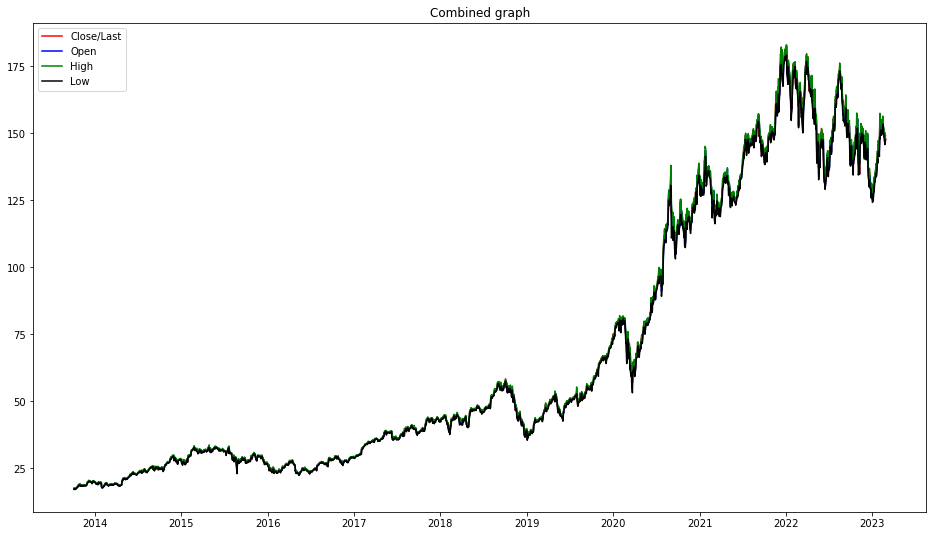

In [37]:
# Combined graph of 4 variables of the past 10 years
fig, ax = plt.subplots(figsize=(16,9))
ax.plot('Close/Last', data=df, color='red', label='Close/Last')
ax.plot('Open', data=df, color='blue', label='Open')
ax.plot('High', data=df, color='green', label='High')
ax.plot('Low', data=df, color='black', label='Low')
ax.set_title('Combined graph')
ax.legend()

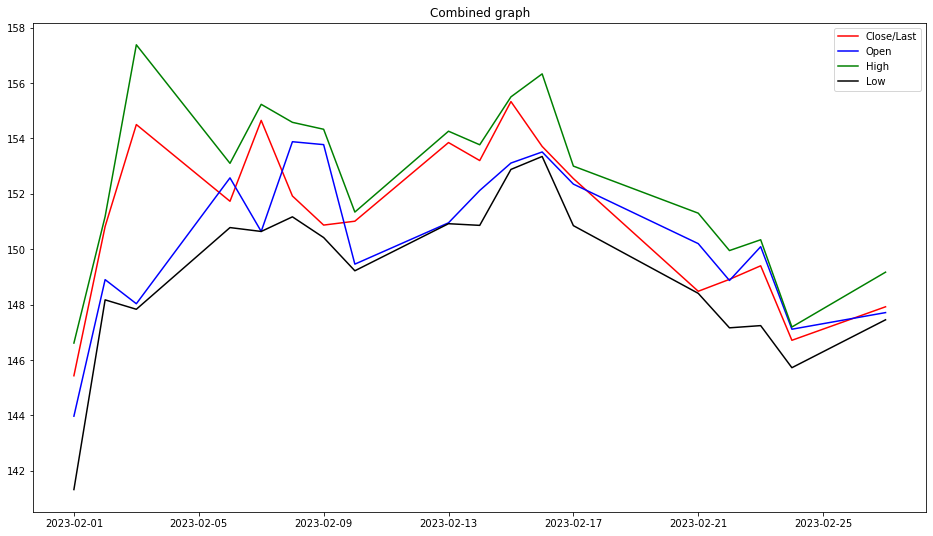

In [38]:
# Combined graph of 4 variables for 1 month (Feb of 2023)
df1 = df.loc['2023-2-1': '2023-2-28']
fig, ax = plt.subplots(figsize=(16,9))
ax.plot('Close/Last', data=df1, color='red', label='Close/Last')
ax.plot('Open', data=df1, color='blue', label='Open')
ax.plot('High', data=df1, color='green', label='High')
ax.plot('Low', data=df1, color='black', label='Low')
ax.set_title('Combined graph')
ax.legend()

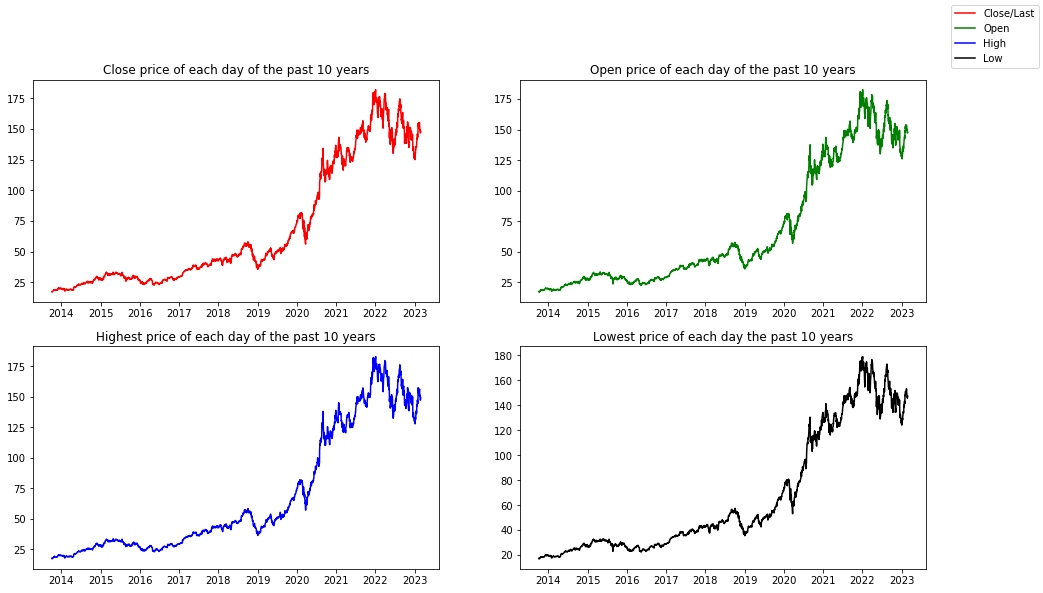

In [39]:
# 4 graphs with each variables from the past 10 years
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))
fig, ((ax1, ax2), (ax3, ax4)) = plot_objects
ax1.plot('Close/Last', data=df, c='red')
ax2.plot('Open', data=df, c='green')
ax3.plot('High', data=df, c='blue')
ax4.plot('Low', data=df, c='black')

ax1.set_title('Close price of each day of the past 10 years')
ax2.set_title('Open price of each day of the past 10 years')
ax3.set_title('Highest price of each day of the past 10 years')
ax4.set_title('Lowest price of each day the past 10 years')


fig.legend()

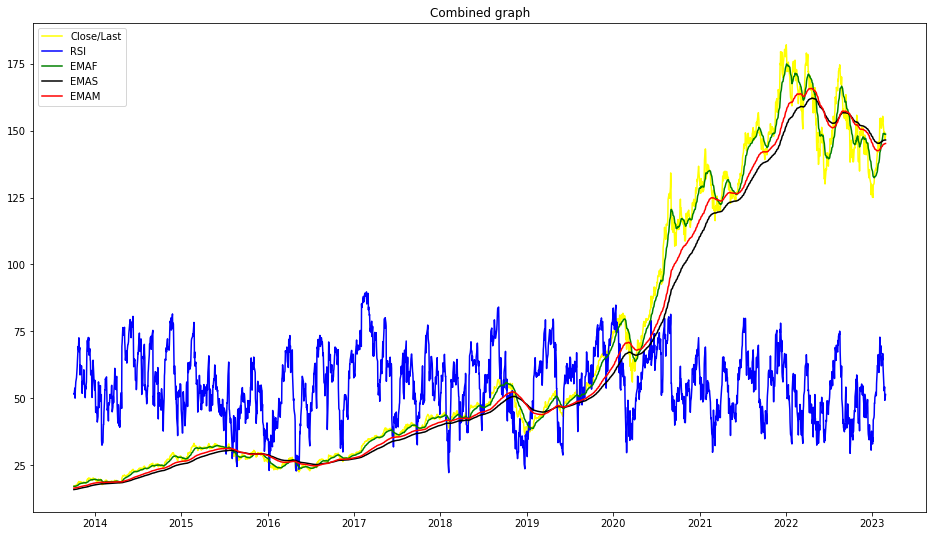

In [40]:
# Combined graph of 5 independent variable (Close/last, RSI, EMAF, EMAM, EMAS) of the past 10 years
fig, ax = plt.subplots(figsize=(16,9))
ax.plot('Close/Last', data=df, color='yellow', label='Close/Last')
ax.plot('RSI', data=df, color='blue', label='RSI')
ax.plot('EMAF', data=df, color='green', label='EMAF')
ax.plot('EMAS', data=df, color='black', label='EMAS')
ax.plot('EMAM', data=df, color='red', label='EMAM')
ax.set_title('Combined graph')
ax.legend()

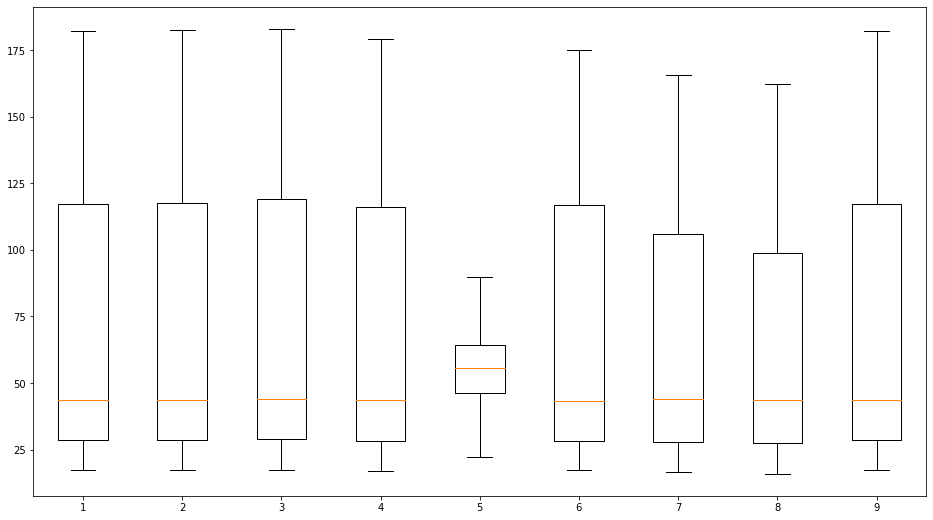

In [41]:
# Box plot (useless)
# No need
fig, ax = plt.subplots(figsize=(16,9))
ax.boxplot(df)
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Scalling the data for better result in RNN models 
# Dropping the 'Target' column because it is not suppose to be scaled
# Add it in ad the end after scalling 
df1 = df
df1 = df1.drop('Target', axis='columns')
sc = MinMaxScaler()
df1 = pd.DataFrame(sc.fit_transform(df1.values), columns=df1.columns, index=df1.index)
df_scaled = pd.concat([df1, df['Target']], axis=1)
df_scaled

,Close/Last,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target
Date,,,,,,,,,
2013-10-03,0.000535,0.001436,0.001671,0.000542,0.435872,0.000000,0.000000,0.000000,17.2511
2013-10-04,0.000453,0.000000,0.000000,0.000071,0.432952,0.000034,0.000096,0.000115,17.4196
2013-10-07,0.001475,0.000583,0.001736,0.001558,0.467792,0.000166,0.000213,0.000243,17.1764
2013-10-08,0.000000,0.001314,0.001303,0.000498,0.412105,0.000138,0.000295,0.000347,17.3781
2013-10-09,0.001224,0.000169,0.000688,0.000000,0.455258,0.000236,0.000402,0.000469,17.4871
...,...,...,...,...,...,...,...,...,...
2023-02-21,0.796583,0.803870,0.808975,0.810446,0.452476,0.835195,0.860444,0.892519,148.9100
2023-02-22,0.799191,0.795826,0.800825,0.802763,0.462562,0.835233,0.860974,0.892747,149.4000
2023-02-23,0.802164,0.803204,0.803179,0.803257,0.474489,0.835563,0.861558,0.893017,146.7100


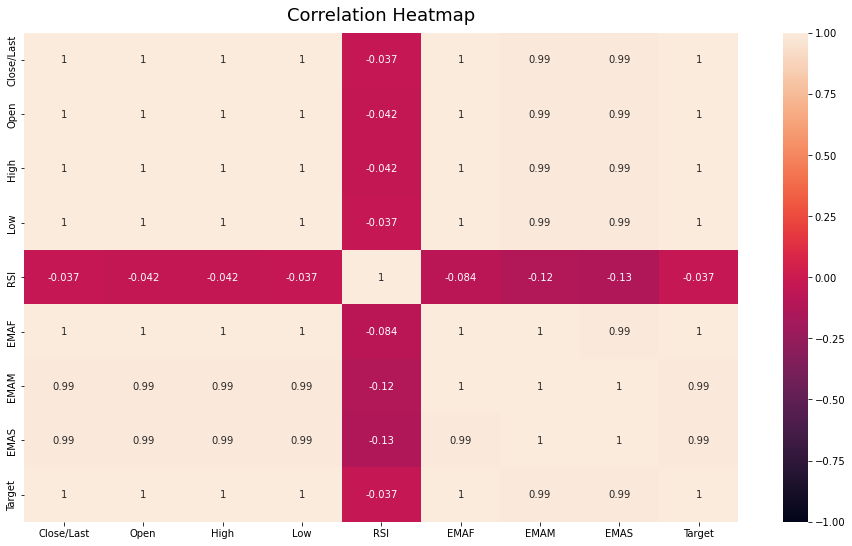

In [44]:
# Weird correlation heat map
# Past 10 years data (before scalling)

plt.figure(figsize=(16,9))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to 
# True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

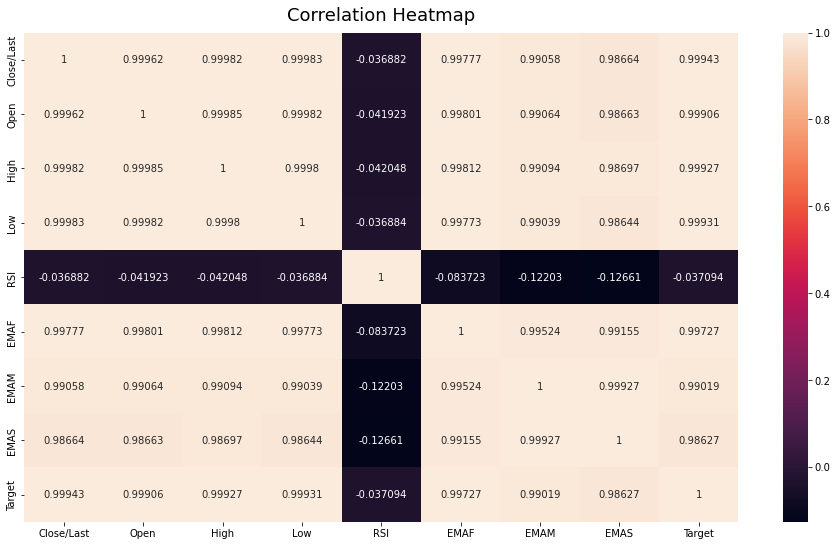

In [45]:
# Weird correlation heat map
# Past 10 years data (after scalling)

plt.figure(figsize=(16,9))
# True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_scaled.corr(),annot=True, fmt='.5g')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

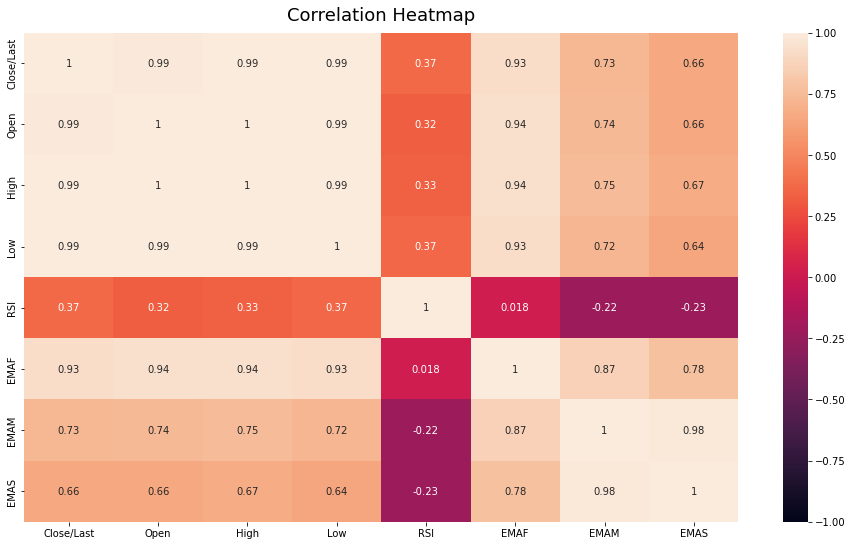

In [46]:
df2 = df1.loc['2021-3-1': '2023-3-31']

# Correlation map within a month only

plt.figure(figsize=(16,9))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to 
# True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [47]:
df_scaled.corr()

,Close/Last,Open,High,Low,RSI,EMAF,EMAM,EMAS,Target
Close/Last,1.000000,0.999621,0.999824,0.999829,-0.036882,0.997767,0.990581,0.986642,0.999426
Open,0.999621,1.000000,0.999855,0.999823,-0.041923,0.998005,0.990635,0.986630,0.999056
High,0.999824,0.999855,1.000000,0.999797,-0.042048,0.998117,0.990945,0.986973,0.999269
Low,0.999829,0.999823,0.999797,1.000000,-0.036884,0.997726,0.990394,0.986443,0.999311
RSI,-0.036882,-0.041923,-0.042048,-0.036884,1.000000,-0.083723,-0.122027,-0.126610,-0.037094
EMAF,0.997767,0.998005,0.998117,0.997726,-0.083723,1.000000,0.995236,0.991553,0.997271
EMAM,0.990581,0.990635,0.990945,0.990394,-0.122027,0.995236,1.000000,0.999270,0.990194
EMAS,0.986642,0.986630,0.986973,0.986443,-0.126610,0.991553,0.999270,1.000000,0.986273
Target,0.999426,0.999056,0.999269,0.999311,-0.037094,0.997271,0.990194,0.986273,1.000000


# Training data

In [48]:
df1=df
sc = MinMaxScaler(feature_range=(0,1))
df_scaled = sc.fit_transform(df1)
print(df_scaled)

[[5.35085080e-04 1.43635322e-03 1.67116557e-03 ... 0.00000000e+00
  0.00000000e+00 4.53184302e-04]
 [4.53184302e-04 0.00000000e+00 0.00000000e+00 ... 9.61371777e-05
  1.14572550e-04 1.47542734e-03]
 [1.47542734e-03 5.83008214e-04 1.73576626e-03 ... 2.12732320e-04
  2.42902980e-04 0.00000000e+00]
 ...
 [8.02164122e-01 8.03204489e-01 8.03179199e-01 ... 8.61558355e-01
  8.93017375e-01 7.85844634e-01]
 [7.85844634e-01 7.85182036e-01 7.84161238e-01 ... 8.61774449e-01
  8.93040022e-01 7.93185370e-01]
 [7.93185370e-01 7.88810718e-01 7.96115385e-01 ... 8.62146843e-01
  8.93172062e-01 7.90091341e-01]]


In [49]:
np.shape(df_scaled)

(2366, 9)

In [50]:
arr = np.zeros((1, 2, 3))
  
gfg = np.moveaxis(arr, 0, 1).shape
  
print (gfg)

(2, 1, 3)


In [51]:
# Reason for the np.moveaxis
'''
X = []
backcandles = 30
print(df_scaled.shape[0])
for j in range(8):
    X.append([])
    for i in range(backcandles, df_scaled.shape[0]):#backcandles+2
        X[j].append(df_scaled[i-backcandles:i, j])
X=np.moveaxis(X, [0], [2])
np.shape(X)  
'''

'\nX = []\nbackcandles = 30\nprint(df_scaled.shape[0])\nfor j in range(8):\n    X.append([])\n    for i in range(backcandles, df_scaled.shape[0]):#backcandles+2\n        X[j].append(df_scaled[i-backcandles:i, j])\nX=np.moveaxis(X, [0], [2])\nnp.shape(X)  \n'

In [52]:
# multiple feature from data provided to the model
X = []
#print(df_scaled[0].size)
#df_scaled=df_scaled.values
backcandles = 30
print(df_scaled.shape[0])
for j in range(8):#df_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, df_scaled.shape[0]):#backcandles+2
        X[j].append(df_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(df_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2366
[[[5.35085080e-04 1.43635322e-03 1.67116557e-03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [4.53184302e-04 0.00000000e+00 0.00000000e+00 ... 3.35875314e-05
   9.61371777e-05 1.14572550e-04]
  [1.47542734e-03 5.83008214e-04 1.73576626e-03 ... 1.65781560e-04
   2.12732320e-04 2.42902980e-04]
  ...
  [8.25681172e-03 7.80408505e-03 7.99358099e-03 ... 7.74011237e-03
   4.99754246e-03 4.76852845e-03]
  [8.46550703e-03 7.30272218e-03 8.47838805e-03 ... 7.83449455e-03
   5.16998878e-03 4.93966997e-03]
  [8.60079498e-03 7.37408625e-03 8.11855616e-03 ... 7.93336129e-03
   5.34197976e-03 5.11056633e-03]]

 [[4.53184302e-04 0.00000000e+00 0.00000000e+00 ... 3.35875314e-05
   9.61371777e-05 1.14572550e-04]
  [1.47542734e-03 5.83008214e-04 1.73576626e-03 ... 1.65781560e-04
   2.12732320e-04 2.42902980e-04]
  [0.00000000e+00 1.31358282e-03 1.30288125e-03 ... 1.38447691e-04
   2.94743524e-04 3.47486330e-04]
  ...
  [8.46550703e-03 7.30272218e-03 8.47838805e-03 ... 7.83449455e-03
   5.

In [53]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1868
(1868, 30, 8)
(468, 30, 8)
(1868, 1)
(468, 1)


# Data modelling

In [54]:
#! pip install keras
#! pip install tensorflow
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

In [55]:
lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
113/113 [==============================] - 4s 21ms/step - loss: 0.0013 - val_loss: 9.8170e-04
Epoch 2/30
113/113 [==============================] - 2s 20ms/step - loss: 7.7831e-05 - val_loss: 9.8301e-04
Epoch 3/30
113/113 [==============================] - 2s 20ms/step - loss: 6.4002e-05 - val_loss: 9.1085e-04
Epoch 4/30
113/113 [==============================] - 2s 18ms/step - loss: 6.6129e-05 - val_loss: 8.4066e-04
Epoch 5/30
113/113 [==============================] - 2s 18ms/step - loss: 6.0590e-05 - val_loss: 0.0013
Epoch 6/30
113/113 [==============================] - 2s 18ms/step - loss: 5.9469e-05 - val_loss: 0.0012
Epoch 7/30
113/113 [==============================] - 2s 18ms/step - loss: 6.4455e-05 - val_loss: 0.0013
Epoch 8/30
113/113 [==============================] - 2s 18ms/step - loss: 6.5951e-05 - val_loss: 8.0116e-04
Epoch 9/30
113/113 [==============================] - 2s 18ms/step - loss: 7.2904e-05 - val_loss: 0.0011
Epoch 10/30
113/113 [==================

In [56]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

15/15 [==============================] - 1s 10ms/step
[0.7352909] [0.70570321]
[0.7305814] [0.69623912]
[0.7286195] [0.71067792]
[0.723004] [0.71310461]
[0.72852457] [0.71110259]
[0.73356694] [0.70618854]
[0.7349897] [0.70558187]
[0.7315939] [0.69332709]
[0.7321123] [0.69987915]
[0.7201706] [0.67142621]


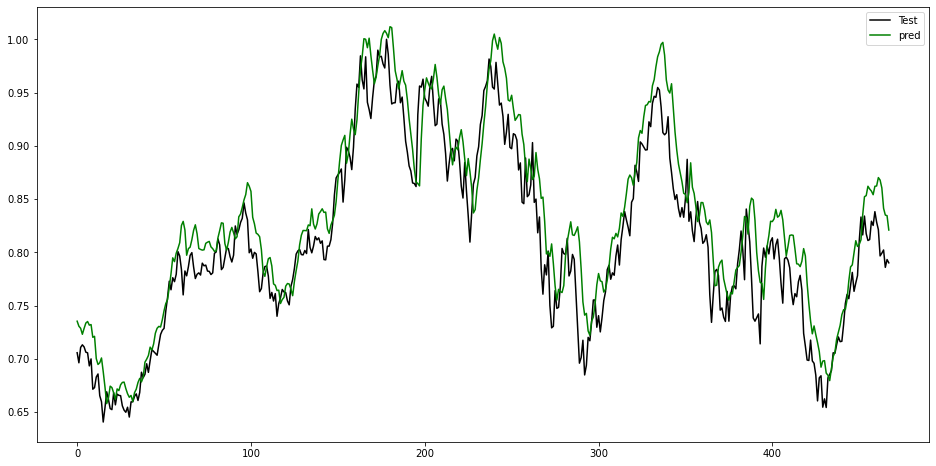

In [57]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

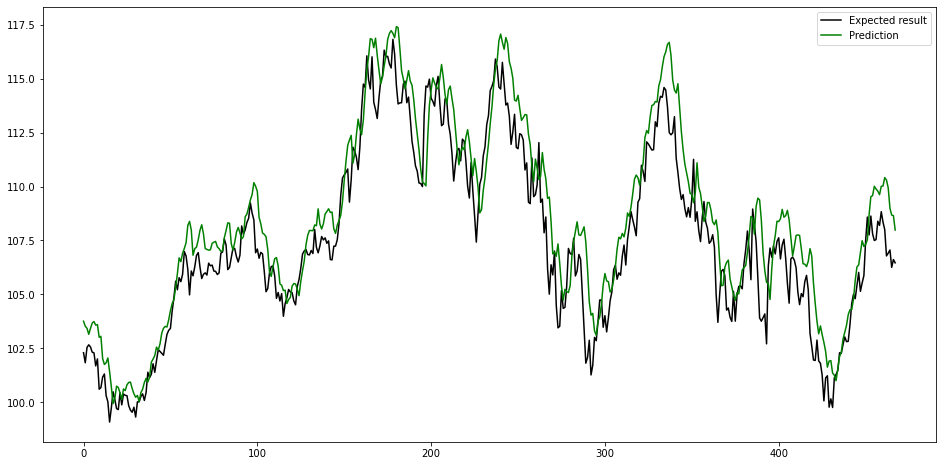

In [58]:
# Reverse scalling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
n = df1['Target']
n = n.values.reshape(-1,1)
scaler.fit(n)
scaled = scaler.transform(n)


# for inverse transformation (Prediction)
inversed_pred = scaler.inverse_transform(y_pred)


# for inverse transformation (Test)
inversed_test = scaler.inverse_transform(y_test)


plt.figure(figsize=(16,8))
plt.plot(inversed_test, color = 'black', label = 'Expected result')
plt.plot(inversed_pred, color = 'green', label = 'Prediction')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt

In [60]:
# Metrics

# MAE
mae_LSTM = mean_absolute_error(inversed_test, inversed_pred)
print('MAE: %f' % mae_LSTM)

# RSME
mse_LSTM = mean_squared_error(inversed_test, inversed_pred)
rmse_LSTM = sqrt(mse_LSTM)
print(f'RSME: {rmse_LSTM}')



MAE: 1.354963
RSME: 1.7132955604101168


# Linear regression 

In [61]:
# Set the date as the index
df = pd.read_csv('AAPL.csv',
                index_col=0,
                 parse_dates=True)

# Only taking historical prices from the past 10 years
df = df.loc['2013-3-1': '2023-2-28']

# Reverse it 
df = df[::-1]

# Converting the data 
df['Close/Last'] = pd.to_numeric(df['Close/Last'].str.replace('$', ''))
df['Open'] = pd.to_numeric(df['Open'].str.replace('$', ''))
df['High'] = pd.to_numeric(df['High'].str.replace('$', ''))
df['Low'] = pd.to_numeric(df['Low'].str.replace('$', ''))

df['RSI']=ta.rsi(df['Close/Last'], length=15)
df['EMAF']=ta.ema(df['Close/Last'], length=20)
df['EMAM']=ta.ema(df['Close/Last'], length=100)
df['EMAS']=ta.ema(df['Close/Last'], length=150)
df['Target']=df['Close/Last'].shift(-1)

df.drop('Volume', axis=1, inplace=True)
df.dropna(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_18004/4281257243.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close/Last'] = pd.to_numeric(df['Close/Last'].str.replace('$', ''))
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_18004/4281257243.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Open'] = pd.to_numeric(df['Open'].str.replace('$', ''))
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_18004/4281257243.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['High'] = pd.to_numeric(df['High'].str.replace

Text(0.5, 1.0, 'Stock price of Apple for the past 10 years')

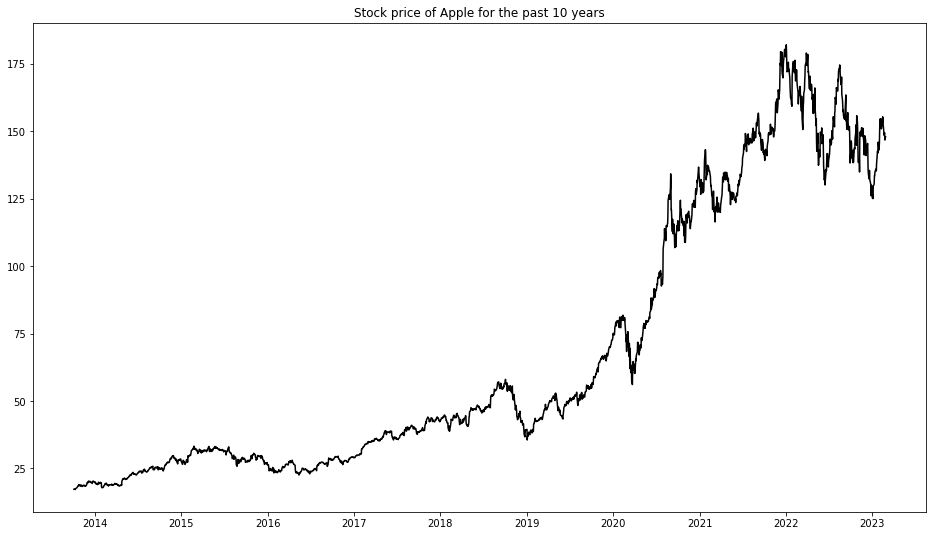

In [62]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot('Close/Last', data=df1, color='black', label='Close/Last')
ax.set_title('Stock price of Apple for the past 10 years')

# Test train set 

In [63]:
def create_train_test_data(df):
    
    features= df.drop(columns=['Target'], axis=1)
    target = df['Target']
    
    df_len = df.shape[0]
    print('Total length of the data : ', str(df_len))
    
    # Creating the split
    train_df = int(df_len*0.88)
    print('Length of the training dataset: ', str(train_df))
    
    val_df = train_df+ int(df_len * 0.1)
    print('Validation Set length - ', str(int(df_len * 0.1)))

    print('Test Set length - ', str(int(df_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_df], features[train_df:val_df], features[val_df:]
    Y_train, Y_val, Y_test = target[:train_df], target[train_df:val_df], target[val_df:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [64]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_data(df)

Total length of the data :  2366
Length of the training dataset:  2082
Validation Set length -  236
Test Set length -  47
(2082, 8) (236, 8) (48, 8)
(2082,) (236,) (48,)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [66]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

Y_train_pred = model_lr.predict(X_train)
Y_val_pred = model_lr.predict(X_val)
Y_test_pred = model_lr.predict(X_test)

In [67]:
# Evaluation
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))
print('')
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))
print('')
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training RMSE:  1.26
Training MAE:  0.73

Validation RMSE:  3.49
Validation MAE:  2.76

Test RMSE:  2.48
Test MAE:  2.06


In [68]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2022-01-10,175.08,172.183860
1,2022-01-11,175.53,174.615354
2,2022-01-12,172.19,176.171279
3,2022-01-13,173.07,172.732093
4,2022-01-14,169.80,173.752231
...,...,...,...
231,2022-12-09,144.49,143.436095
232,2022-12-12,145.47,143.996646
233,2022-12-13,143.21,145.237021
234,2022-12-14,136.50,143.028313


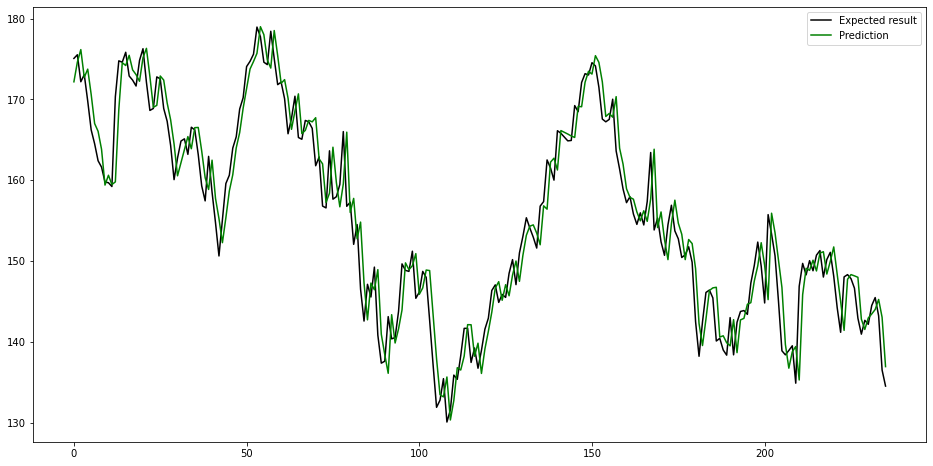

In [69]:
plt.figure(figsize=(16,8))
plt.plot(df_pred['Actual'], color = 'black', label = 'Expected result')
plt.plot(df_pred['Predicted'], color = 'green', label = 'Prediction')
plt.legend()
plt.show()